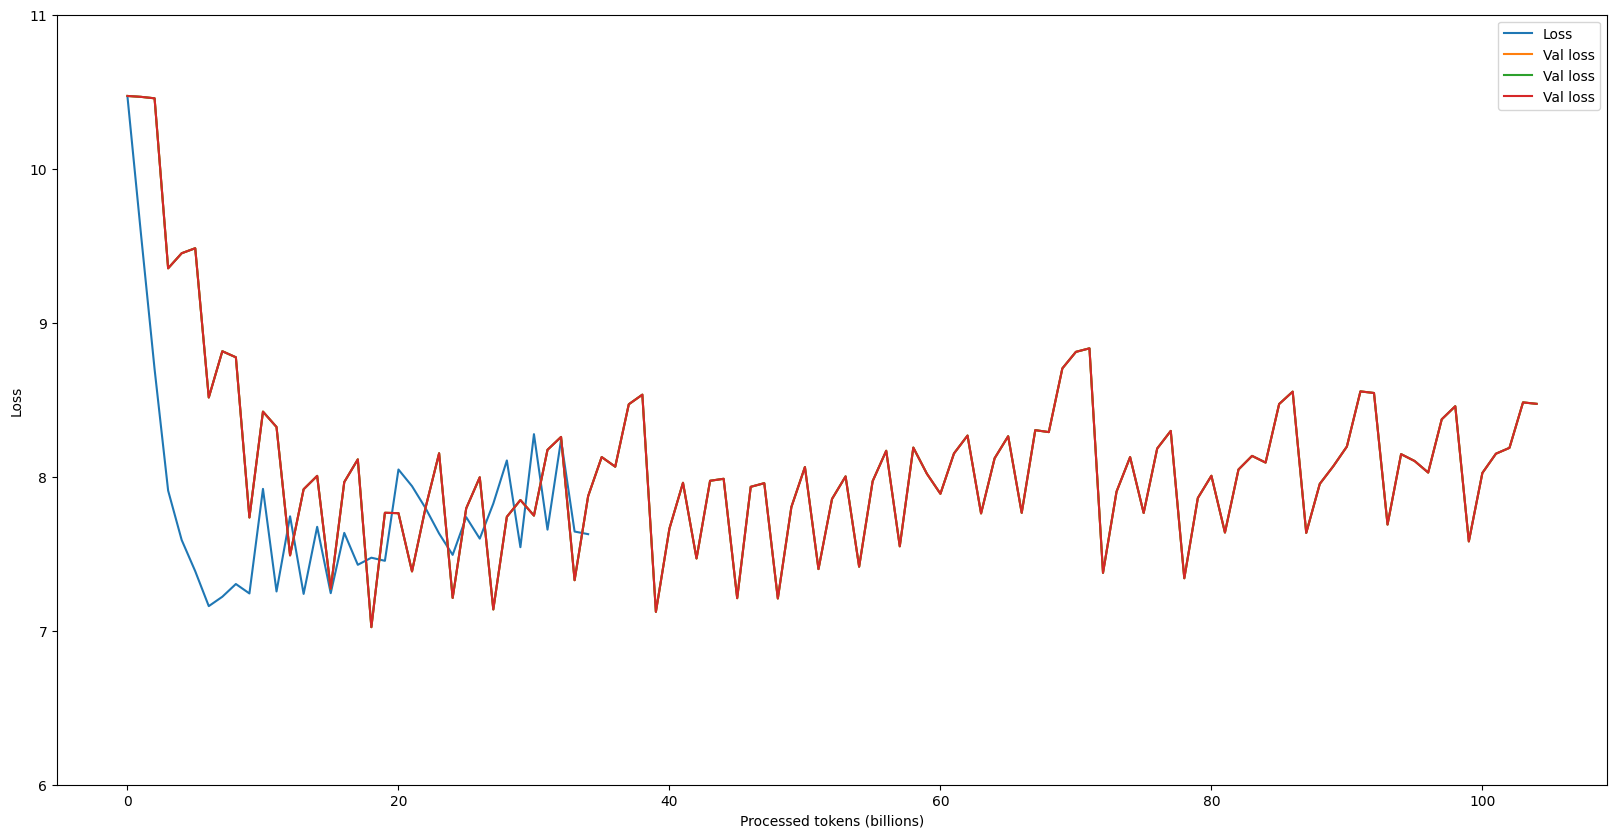

[10.47250747680664, 10.466650009155273, 10.457225799560547, 9.353289604187012, 9.451130867004395, 9.48377513885498, 8.514466285705566, 8.8148775100708, 8.775519371032715, 7.735356330871582, 8.422638893127441, 8.322762489318848, 7.489595413208008, 7.918468952178955, 8.005460739135742, 7.272857189178467, 7.965184688568115, 8.112590789794922, 7.0231828689575195, 7.765794277191162, 7.763362407684326, 7.385290622711182, 7.798922538757324, 8.152153968811035, 7.2131829261779785, 7.794395923614502, 7.996281147003174, 7.138314247131348, 7.7396769523620605, 7.848635673522949, 7.747674465179443, 8.174647331237793, 8.258298873901367, 7.328125953674316, 7.874167442321777, 8.127622604370117, 8.065130233764648, 8.470495223999023, 8.532837867736816, 7.122570037841797, 7.663367748260498, 7.9606032371521, 7.469123363494873, 7.973658561706543, 7.986571788787842, 7.211269855499268, 7.934443473815918, 7.9580488204956055, 7.209467887878418, 7.803157329559326, 8.062896728515625, 7.400346279144287, 7.85555362

In [9]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from dimgpt.settings import *

metrics = pickle.load(open('./output/metrics.pkl', 'rb'))

plt.figure(figsize = (20, 10))

plt.plot(metrics['loss'], label = 'Loss')
plt.plot(metrics['val_losses'][0], label = 'Val loss')
plt.plot(metrics['val_losses'][1], label = 'Val loss')
plt.plot(metrics['val_losses'][2], label = 'Val loss')

plt.ylim(6, 11)
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Processed tokens (billions)')
plt.show()

for i in range(len(metrics['val_losses'])):
	print(metrics['val_losses'][i])

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

logs = pickle.load(open('./bacup/gpt_64/logs.pkl', 'rb'))
new_logs = pickle.load(open('./output/logs.pkl', 'rb'))

x_accuracy = np.array(logs['tokens']) / 1e9
y_accuracy = logs['accuracy']

x_val_accuracy = np.array(logs['tokens']) / 1e9
y_val_accuracy = logs['val_accuracy']

x_new_accuracy = np.array(new_logs['tokens']) / 1e9
y_new_accuracy = new_logs['accuracy']

x_new_val_accuracy = np.array(new_logs['tokens']) / 1e9
y_new_val_accuracy = new_logs['val_accuracy']

window = 10

x_accuracy = x_accuracy[window - 1:]
y_accuracy = np.convolve(y_accuracy, np.ones(window), 'valid') / window

x_val_accuracy = x_val_accuracy[window - 1:]
y_val_accuracy = np.convolve(y_val_accuracy, np.ones(window), 'valid') / window

x_new_accuracy = x_new_accuracy[window - 1:]
y_new_accuracy = np.convolve(y_new_accuracy, np.ones(window), 'valid') / window

x_new_val_accuracy = x_new_val_accuracy[window - 1:]
y_new_val_accuracy = np.convolve(y_new_val_accuracy, np.ones(window), 'valid') / window

plt.figure(figsize = (20, 10))

plt.plot(x_val_accuracy, y_val_accuracy, label = 'Val accuracy', color = 'orange')
plt.plot(x_accuracy, y_accuracy, label = 'accuracy', color = 'red')

plt.plot(x_new_val_accuracy, y_new_val_accuracy, label = 'New val accuracy', color = 'deepskyblue')
plt.plot(x_new_accuracy, y_new_accuracy, label = 'New accuracy', color = 'blue')

plt.ylim(0.2, 0.45)
plt.xlim(0, 1.5)
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Processed tokens (billions)')
plt.show()

print(f'Accuracy: {np.max(logs["accuracy"]):.3f}')
print(f'Val accuracy: {np.max(logs["val_accuracy"]):.3f}')
print(f'New accuracy: {np.max(new_logs["accuracy"]):.3f}')
print(f'New val accuracy: {np.max(new_logs["val_accuracy"]):.3f}')